In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/focusai/replicate1/pneumoniadata/chest_xray"

test  train  val


In [ ]:
model = tf.keras.models.Sequential([
  
    # first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
  
    # second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    "/content/drive/My Drive/focusai/replicate1/pneumoniadata/chest_xray/train/",
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    "/content/drive/My Drive/focusai/replicate1/pneumoniadata/chest_xray/val/",
    target_size = (300, 300),
    batch_size = 16,
    class_mode = 'binary'
)

# training the model
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 10,
    validation_data = validation_generator
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10
25/25 [==============================] - 1492s 59s/step - loss: 0.7407 - accuracy: 0.6536 - val_loss: 0.7768 - val_accuracy: 0.5000
Epoch 2/10
25/25 [==============================] - 569s 22s/step - loss: 0.4233 - accuracy: 0.8069 - val_loss: 0.6755 - val_accuracy: 0.6250
Epoch 3/10
25/25 [==============================] - 322s 12s/step - loss: 0.2653 - accuracy: 0.8894 - val_loss: 10.0873 - val_accuracy: 0.5000
Epoch 4/10
25/25 [==============================] - 291s 11s/step - loss: 0.8822 - accuracy: 0.8861 - val_loss: 0.1912 - val_accuracy: 0.8750
Epoch 5/10
25/25 [==============================] - 285s 11s/step - loss: 0.1925 - accuracy: 0.9260 - val_loss: 0.1184 - val_accuracy: 0.9375
Epoch 6/10
25/25 [==============================] - 284s 11s/step - loss: 0.2509 - accuracy: 0.9065 - val_loss: 0.1497 - val_accuracy: 0.9375
Epoch 7/10
25/25 [==============================] - 288s 11s/ste

Saving person1_virus_9.jpeg to person1_virus_9 (5).jpeg
[1.]
person1_virus_9.jpeg is pneumonia


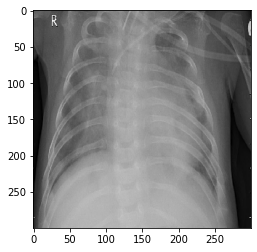

In [ ]:
# allow user to upload the image to predict
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  # predict images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis =0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(classes[0])
  if classes[0]> 0.5:
    print(fn + ' is pneumonia')
    plt.imshow(img)
  else:
    print(fn + 'is normal')
    plt.imshow(img)